___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [1]:
import pandas as pd
import numpy as np
import locale
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define Moeda Brasileira numeros R$ 1.000,00
locale.setlocale( locale.LC_ALL, '' )
#locale.currency( g, grouping = True )

'Portuguese_Brazil.1252'

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
from numpy.random import randn
np.random.seed(101)

In [5]:
pd.options.display.float_format = 'R${:,.2f}'.format

In [6]:
df = pd.read_csv('NFe-SupraAlimentos.csv')

# xml,empresa,NF,data,CNPJ,cidade,bairro,UF,cod,produto,qty,unidade,preco

C:\Users\leona\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head()

,xml,cliente,NF,data,CNPJ,cidade,bairro,UF,cod,produto,QTY,unidade,preco
0,33140817339293000139550010000000041000000049-N...,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,4,2014-08-29,27833615002018,RIO DE JANEIRO,CASIMIRO DE ABREU,RJ,02.0002,ALHO CEBOLA PICADINHO S/SAL 180GR,1,UN,R$2.77
1,33140817339293000139550010000000051000000054-N...,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,5,2014-08-29,9309021000168,RIO DE JANEIRO,VILA NOVA DE CAMPOS,RJ,01.0002,ALECRIM 15GR,1,UN,R$1.11
2,33140817339293000139550010000000061000000060-N...,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,6,2014-08-29,9309021000168,ANGRA DOS REIS,VILA NOVA DE CAMPOS,RJ,01.0001,ACAFRAO 15GR,12,UN,R$9.72
3,33140817339293000139550010000000061000000060-N...,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,6,2014-08-29,9309021000168,ANGRA DOS REIS,VILA NOVA DE CAMPOS,RJ,01.0002,ALECRIM 15GR,1,UN,R$1.11
4,33140817339293000139550010000000061000000060-N...,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,6,2014-08-29,9309021000168,ANGRA DOS REIS,VILA NOVA DE CAMPOS,RJ,01.0009,CALDO DE CARNE COM ERVAS FINAS 60GR,1,UN,R$1.43


## Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [8]:
df[['preco']] = df[['preco']].apply(pd.to_numeric)

In [11]:
tot = df['preco'].sum()

In [12]:
g = float("{0:.2f}".format(tot))

In [13]:
g

11677734.97

In [14]:

f=locale.currency( g, grouping = True )

In [15]:
f

'R$11.677.734,97'

In [16]:
cnpjCompras = df.groupby(['CNPJ'])['preco'].agg('sum')

In [18]:
a=cnpjCompras

In [31]:
type(a)
a.preco.min()
f=locale.currency( a.preco.max(), grouping = True )

In [32]:
f

'R$474.946,97'

In [21]:
a = a.to_frame().reset_index()

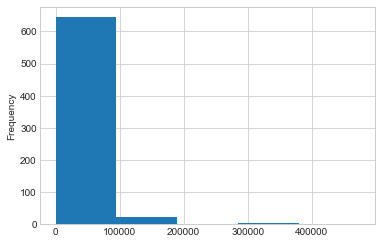

In [46]:
a['preco'].plot.hist(bins=5)

In [22]:
type(a)

pandas.core.frame.DataFrame

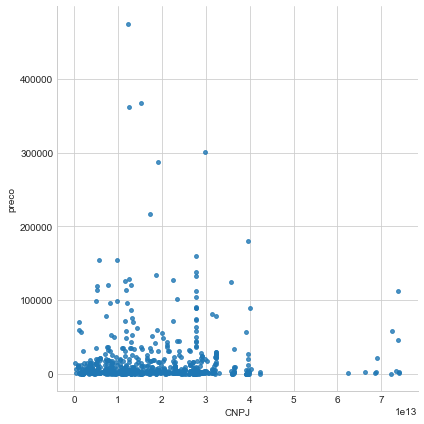

In [38]:
sns.set_style('whitegrid')
sns.lmplot('CNPJ','preco',data=a,
           palette='coolwarm',size=6,aspect=1,fit_reg=False, scatter_kws={"s": 15})

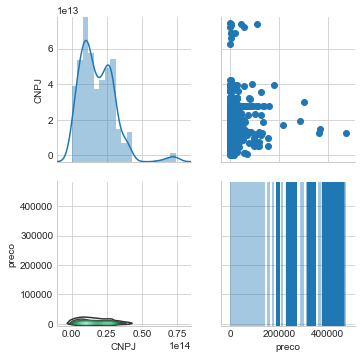

In [40]:
#sns.pairplot(a)
g=sns.PairGrid(a)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [24]:
a

,CNPJ,preco
0,175479000105,"R$14,429.17"
1,334392000206,"R$1,511.64"
2,381613000116,"R$6,249.46"
3,803210000118,"R$11,911.61"
4,814123000166,"R$9,583.20"
5,834279000109,"R$9,239.94"
6,834279000290,"R$9,947.07"
7,1006952000185,"R$6,641.14"
8,1015564000160,"R$70,625.02"
9,1023162000108,R$853.40


In [ ]:
# Numero de Clientes
a=df.groupby(['CNPJ','NF','preco'])

In [ ]:
#dados = olx.groupby(olx['timestamp'].str[8:10]).size()
#df.groupby(['NF']).sum()
#df.groupby(['CNPJ', 'NF'])['preco'].agg('sum')
#a=df.groupby(['CNPJ',df['data']])['NF'].unique() #.count() #agg('sum') .str[0:7]
cnpjCompras = df.groupby(['CNPJ'])['preco'].agg('sum')

In [ ]:
type(cnpjCompras)

In [ ]:
cnpjCompras.count()

In [ ]:
f=locale.currency( cnpjCompras.min(), grouping = True )

In [ ]:
f

In [ ]:
df.groupby(['CNPJ','NF']).size()

In [ ]:
type(a)

In [ ]:
a


In [ ]:
df

In [ ]:
# Pass a list of column names
#Select * from df
lista = df[['data','CNPJ','cidade']]

In [ ]:
type(lista)

In [ ]:
# Select Descrição da linha 100
# loc pega pela Chave
df['descricao'].loc[100]

In [ ]:
# Select * where linha = 100
#linha = df.iloc[1:10] # Pega da index 1 a 9
#linha = df.iloc[10]   # Pega a linha 10
linha = df.iloc[:10] 

df.iloc[4514]

In [ ]:
df[df['produto']=='106']

In [ ]:
(linha)

In [ ]:
df[df['W']>0]['Y']     #df[(df['W']>0) & (df['Y'] > 1)]

In [ ]:
linha.Bairro
#linha.CNPJ
#linha.Preco

In [ ]:
# Select * from df where Descricao = kkkkk
#df[df['Descricao']=='CALDO DE CARNE COM ERVAS FINAS 60GR']
df[df['Preco'] == 'UN']

In [ ]:
mask = (df['Preco'] == 'UN')
#& (df['date'] <= '2000-6-10')
#print np.shape((calit2_dataFrame.loc[mask]))
supra_df = df.loc[mask]

In [ ]:
supra_df

In [ ]:
(df['data'].str[0:7])

In [ ]:
df[(df['Cod']=='01.0009') & (df['Data'].str[0:4] == '2014')]

In [ ]:
#Select Cidade from df where descrição = kkkkk
cidades = df[df['Descricao']=='CALDO DE CARNE COM ERVAS FINAS 60GR'][['Cidade','Bairro','CNPJ']]

In [ ]:
cidades.sort_values(by='CNPJ',ascending=0)

In [ ]:
df.set_index(['Cidade'])

In [ ]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [ ]:
df[['Preco','Qty']] = df[['Preco','Qty']].apply(pd.to_numeric)

In [ ]:
df.pivot_table(values='Preco',index=['Data', 'NF']) #,columns=['C']

In [ ]:
# SQL Syntax (NOT RECOMMENDED!)
df.W

DataFrame Columns are just Series

In [ ]:
type(df['W'])

**Creating a new column:**

In [ ]:
df['new'] = df['W'] + df['Y']

In [ ]:
df

** Removing Columns**

In [ ]:
df.drop('new',axis=1)

In [ ]:
# Not inplace unless specified!
df

In [ ]:
df.drop('new',axis=1,inplace=True)

In [ ]:
df

Can also drop rows this way:

In [ ]:
df.drop('E',axis=0)

** Selecting Rows**

In [ ]:
df.loc['A']

Or select based off of position instead of label 

In [ ]:
df.iloc[2]

** Selecting subset of rows and columns **

In [ ]:
df.loc['B','Y']

In [ ]:
df.loc[['A','B'],['W','Y']]

### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [ ]:
df

In [ ]:
df>0

In [ ]:
df[df>0]

In [ ]:
df[df['W']>0]

In [ ]:
df[df['W']>0]['Y'] 

In [ ]:
df[df['W']>0][['Y','X']]

For two conditions you can use | and & with parenthesis:

In [ ]:
df[(df['W']>0) & (df['Y'] > 1)]

## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [ ]:
df

In [ ]:
# Reset to default 0,1...n index
df.reset_index()

In [ ]:
newind = 'CA NY WY OR CO'.split()

In [ ]:
df['States'] = newind

In [ ]:
df

In [ ]:
df.set_index('States')

In [ ]:
df

In [ ]:
df.set_index('States',inplace=True)

In [ ]:
df

## Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [ ]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [ ]:
hier_index

In [ ]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [ ]:
df.loc['G1']

In [ ]:
df.loc['G1'].loc[1]

In [ ]:
df.index.names

In [ ]:
df.index.names = ['Group','Num']

In [ ]:
df

In [ ]:
df.xs('G1')

In [ ]:
df.xs(['G1',1])

In [ ]:
df.xs(1,level='Num')

# Great Job!